## Intro

- Kaggle Project: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview). Predict sales prices and practice feature engineering, RFs, and gradient boosting.
- [GitHub](https://github.com/ZacksAmber/kaggle-house-prices-advanced-regression-techniques)
- Team: Yummy Donuts from [Data Donut](https://discord.gg/7fkzYbDxAh)
  - [Tina Yu](https://github.com/TinaHTYu)
  - [Zacks Shen](https://github.com/ZacksAmber)
- [Dataset Description](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from plotly.subplots import make_subplots
from sklearn.feature_selection import mutual_info_regression

import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
google_sheet_id = "1a9Xujf0RRGkbuMQxRL378L0dNUcwc2bz-GVxzeTmsT4"
google_sheet_url = f"https://docs.google.com/spreadsheets/d/{google_sheet_id}/gviz/tq?tqx=out:csv&sheet="
Metadata = pd.read_csv(google_sheet_url + 'features')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Metadata

In [5]:
# metadata is from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
# To keep the features have the same name in dataset, we need to manual edit the following:
# SalePrice -  -> SalePrice:
# Bedroom -> BedroomAbvGr
# Kitchen -> KitchenAbvGr
metadata = """SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
BedroomAbvGr: Number of bedrooms above basement level
KitchenAbvGr: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale"""

In [6]:
# Output Metadata
def get_lines(string, train):
    # -1 since no Id
    n_cols = train.shape[1] - 1
    # cols on Google Sheet: 0.col, 1.desc, 2.missing value ratio, 
    # 3.imputation, 4.source data type, 5.target data type, 6.variable type 7.encoding
    cols, descs, source_data_types, missing_value_ratios = [], [], [], []
    train_cols = train.columns
    _missing_value_ratio = train.isnull().mean()
    
    # Split the string by the newline character to create a list of lines
    lines = string.split('\n')

    for line in lines:
        col, desc = line.split(': ')
        source_data_type = str(train[col].dtype)
        missing_value_ratio = round(_missing_value_ratio[col], 3)
        
        cols.append(col)
        descs.append(desc)
        source_data_types.append(source_data_type)
        missing_value_ratios.append(missing_value_ratio)
    
    df = pd.DataFrame(
        {'col': cols,
         'desc': descs,
         'missing value ratio': missing_value_ratios,
         'source data type': source_data_types}
    )
    # Insert empty columns for analysis on Google Sheet
    
    df.insert(3, 'imputation', [None] * n_cols)
    df.insert(5, 'target data type', [None] * n_cols)
    df.insert(6, 'variable type', [None] * n_cols)
    df.insert(7, 'encoding', [None] * n_cols)
    
    return df

# Download this file from Kaggle notebook Output (see right panel),
# then copy and paste the file content to a Google sheet
# See https://docs.google.com/spreadsheets/d/1a9Xujf0RRGkbuMQxRL378L0dNUcwc2bz-GVxzeTmsT4
# df = get_lines(metadata, train)
# df.to_csv('meta_data.csv', index=False)

---

## Missing Values and Imputation Analysis 

- PoolQC: Not every house has a pool. -> Target
- MiscFeature: extra features -> no drop
- Alley: 
- Fence: 
- FireplaceQu: 
- LotFrontage: 
- GarageType: 
- GarageYrBlt: 
- GarageFinish: 
- GarageQual: 
- GarageCond: 
- BsmtExposure: 
- BsmtFinType2: 
- BsmtFinType1: 
- BsmtCond: 
- BsmtQual: 
- MasVnrArea: 
- MasVnrType: 
- Electrical: 


In [7]:
# get categorical variables
cat_cols = train.select_dtypes(include='object').columns

# get cols with null
cols_with_null = train.columns[train.isnull().any()]
cols_with_null = train[cols_with_null].isnull().mean().sort_values(ascending=False).index

# get cols of categorical variables with null
cat_cols_with_null = cat_cols.intersection(cols_with_null)

# get the missing value ratio
train[cols_with_null].isnull().mean()

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [8]:
# make deep copy of t
t = train.copy()
t.fillna({col: 'NA' for col in cat_cols_with_null}, inplace=True)

In [9]:
# edit it later, after get needed features
# fill_NA = ['PoolQC']
# t[fill_NA].fillna('NA', inplace=True)

In [10]:
def cat_cols_bar_plots(df, features, Metadata):
    # Set number of rows and number columns
    n_cols = 4
    n_rows = math.ceil(len(features) / n_cols)

    # Assign row and col id
    row_col = []
    for row_id in range(1, n_rows+1):
        for col_id in range(1, n_cols+1):
            row_col.append((row_id, col_id))

    # Initialize figure with subplots
    fig = make_subplots(
        rows=n_rows, cols=n_cols, subplot_titles=features
    )

    # Add traces
    for idx in range(len(features)):
        # load data
        feature = features[idx]
        row_id, col_id = row_col[idx][0], row_col[idx][1]
        data = df.groupby(feature)['SalePrice'].mean()

        # Add trace
        fig.add_trace(
            go.Bar(
                x=data.index,
                y=data.values,
                name=feature # set up trace name
            ),
            row=row_id, # plot location in subplot 
            col=col_id, # plot location in subplot
        )
        # Update xaxis properties
        desc = Metadata[Metadata['col'] == feature].desc.values[0]
        fig.update_xaxes(title_text=desc, row=row_id, col=col_id)
#         # Update yaxis properties
#         fig.update_yaxes(title_text="SalePrice", row=row_id, col=col_id)
        
#         fig.update_layout(
#             xaxis=dict(title=feature),
#             yaxis=dict(title='SalePrice')
#         )

    # Update title and height
    fig.update_layout(title_text="Categorical Variables vs. AVG SalePrice", height=len(features)*100)

    fig.show()

In [11]:
cat_cols_bar_plots(t, cat_cols_with_null, Metadata)

In [12]:
cat_cols_bar_plots(t, cat_cols, Metadata)

---

## Encoding Analysis

We use average `SalePrice` for each categorical variable to determine which encoding method is better.

In [13]:
# temp fillna
X = t.copy()
y = X.pop("SalePrice")

X.fillna(method='bfill', inplace=True)

In [14]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [15]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores

# mi_scores = make_mi_scores(X[discrete_features.index], y, discrete_features=discrete_features)
mi_scores = make_mi_scores(X[discrete_features.index], y, discrete_features='auto')
mi_scores[::3]  # show a few features with their MI scores

OverallQual      0.572523
GarageCars       0.370158
GarageArea       0.360352
KitchenQual      0.316640
GarageFinish     0.266244
GarageYrBlt      0.230231
FireplaceQu      0.202942
HeatingQC        0.164865
Exterior2nd      0.157710
BsmtFinSF1       0.149293
Exterior1st      0.122533
OverallCond      0.107026
LotShape         0.090368
HouseStyle       0.083416
CentralAir       0.072184
GarageQual       0.066515
BsmtCond         0.047469
LandContour      0.036016
EnclosedPorch    0.023762
RoofStyle        0.016921
BsmtFinSF2       0.011701
KitchenAbvGr     0.004040
PoolQC           0.002639
MoSold           0.000000
Utilities        0.000000
LowQualFinSF     0.000000
RoofMatl         0.000000
Name: MI Scores, dtype: float64

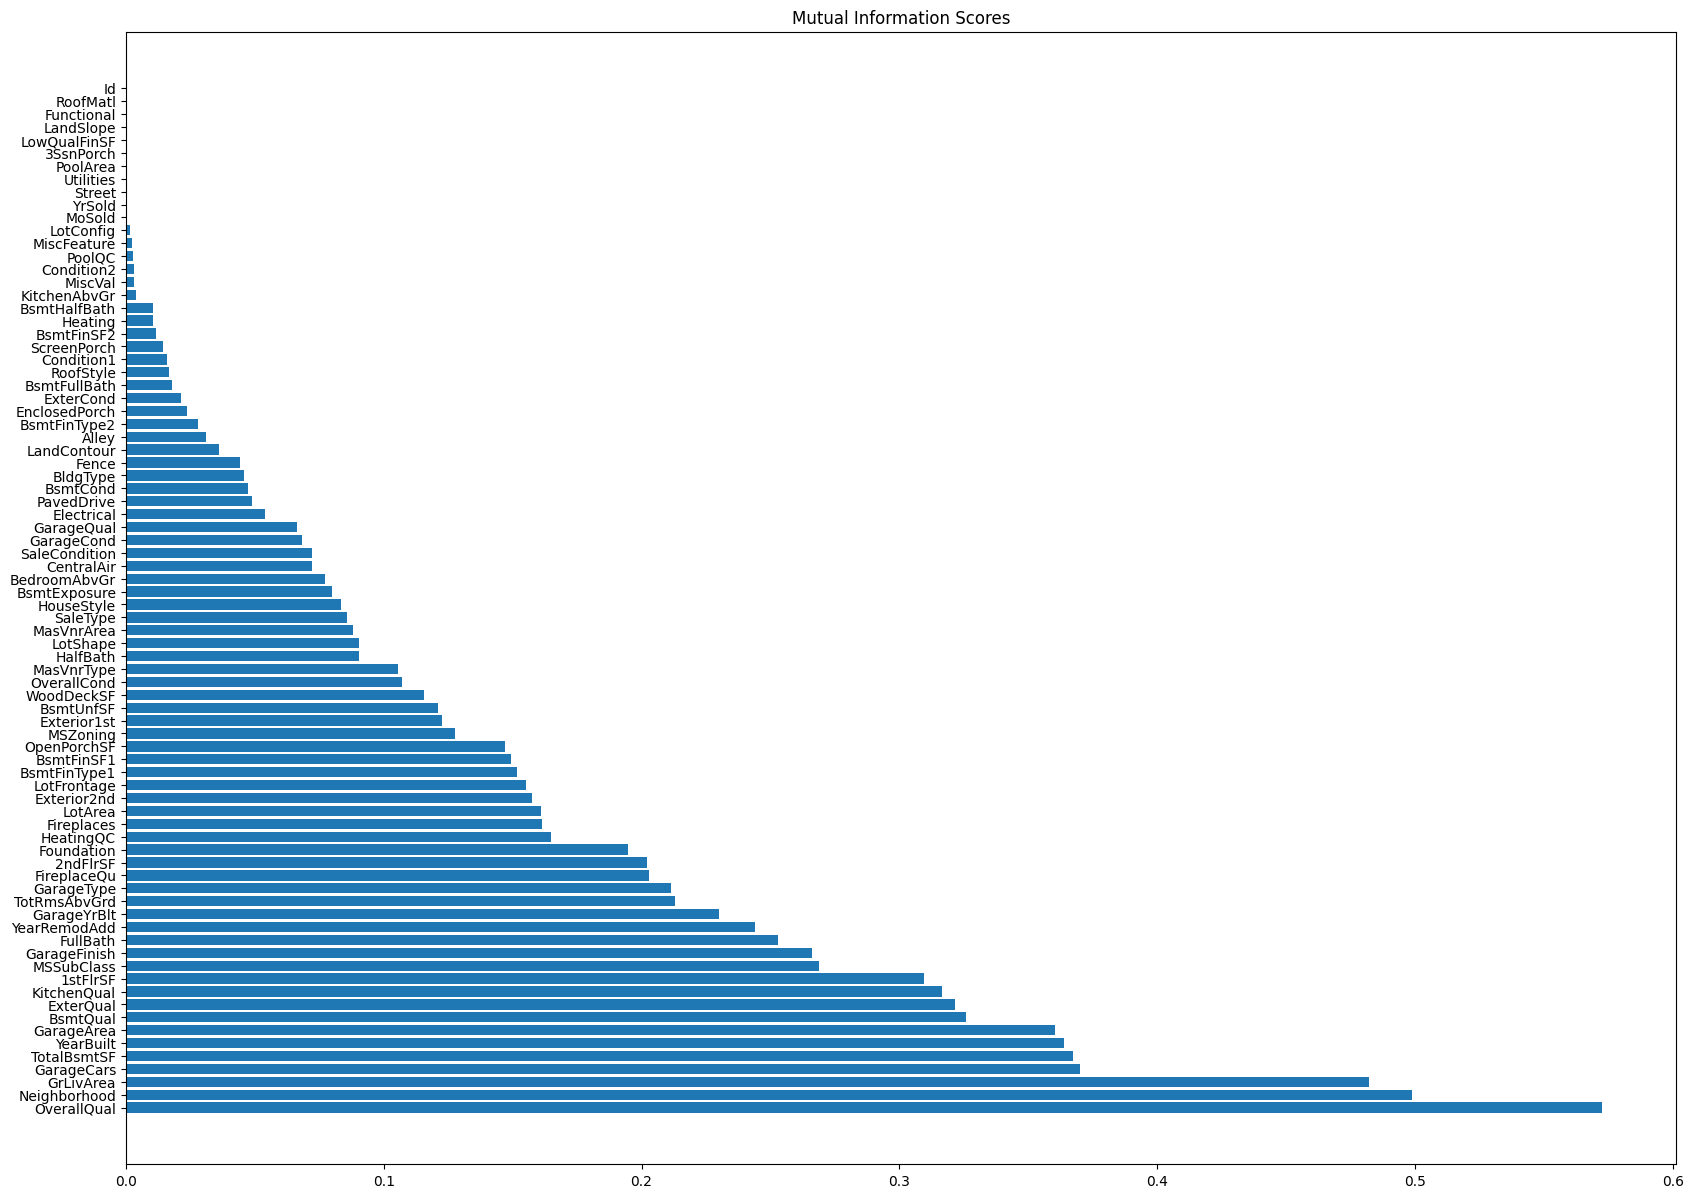

In [16]:
def plot_mi_scores(scores):
    scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(20, 15))
plot_mi_scores(mi_scores)